### Assessment ✅

###### Q) I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [79]:
import pandas as pd
import numpy as np

In [80]:
# loading data
data1 = pd.read_csv("/content/college_1.csv")
data2 = pd.read_csv("/content/college_2.csv")
data1.shape,data2.shape

((84, 7), (35, 9))

In [81]:
data1.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0


In [82]:
data2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


In [83]:
data1_cols = [col for col in data1.columns]
data2_cols = [col for col in data2.columns]
# similar cols
similarCols = [i for i in data1_cols if i in data2_cols]
print(similarCols)
# unique Cols
uniqueCols = []
for i in data1_cols:
  for j in data2_cols:
    if (i not in data2_cols):
      uniqueCols.append(i)
    elif j not in data1_cols:
      uniqueCols.append(j)

print(set(uniqueCols))

['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score', 'Department', 'Rising']
{'python_en', 'computational_thinking'}


In [84]:
data1.corr()

,python,mysql,Previous Geekions,CodeKata Score,Rising
python,1.000000,-0.017869,0.193396,0.193435,0.036014
mysql,-0.017869,1.000000,0.078868,0.079027,0.059001
Previous Geekions,0.193396,0.078868,1.000000,0.999995,0.122370
CodeKata Score,0.193435,0.079027,0.999995,1.000000,0.125564
Rising,0.036014,0.059001,0.122370,0.125564,1.000000


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [85]:
data = pd.concat([data1, data2], axis=0, ignore_index=True)
print(data.shape)
data.tail()

(119, 9)


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0
118,Hariharan,-1.0,-1.0,0,0,Computer Science and Engineering,0,-1.0,0.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [86]:
df_exceededExpectation = data[data["CodeKata Score"]>=15000]
df_exceededExpectation

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0


In [87]:
df_exceededExpectation.to_csv("Exceeded_expectations.csv",index=True,encoding="utf=8")

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [88]:
df_reachedExpectation = data[(data["CodeKata Score"]>=10000) & (data["CodeKata Score"]<15000)]
df_reachedExpectation

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
85,Chandru,0.0,0.0,14150,14490,Computer Science and Engineering,340,20.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
87,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0


In [89]:
df_reachedExpectation.to_csv("Reached_expectations.csv",index=False,encoding="utf-8")

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [90]:
df_Needs_Improvement = data[(data["CodeKata Score"]>=7000) & (data["CodeKata Score"]<10000)]
df_Needs_Improvement

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
5,NIVEESHWAR S,100.0,0.0,8200,8200,Computer Science and Engineering,0,NaN,NaN
6,KALAIARASAN K,85.0,47.0,7750,7880,Electronics and Communication Engineering,130,NaN,NaN
7,MOHAMED ZUBAIR AHMED,82.0,4.0,7020,7020,Computer Science and Engineering,0,NaN,NaN
88,VIINU V P,-1.0,24.0,9150,9150,Electronics and Electrical Engineering,0,100.0,-1.0
89,Poojitha Y,0.0,35.0,7210,8970,Computer Science and Engineering,1760,78.0,0.0
90,Gowtham Chandrasekaran,-1.0,0.0,7250,8950,Computer Science and Engineering,1700,0.0,3.0
91,Gowtham R,-1.0,4.0,8650,8650,Electronics and Communication Engineering,0,60.0,6.0
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
93,Balaji,-1.0,20.0,6170,8160,Electronics and Electrical Engineering,1990,100.0,0.0


In [91]:
df_Needs_Improvement.to_csv("Needs_Improvement.csv",index=False,encoding="utf-8")

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [92]:
df_unsatisfactory = data[data["CodeKata Score"] < 7000]
df_unsatisfactory

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
8,J.SUGANTHI,27.0,50.00,5860,5860,Electronics and Communication Engineering,0,NaN,NaN
9,thamizhpaana,29.0,0.00,5500,5500,Computer Science and Engineering,0,NaN,NaN
10,Iyappan Samiraj,50.0,24.00,5400,5400,Electronics and Communication Engineering,0,NaN,NaN
11,Ponniyamma.R,100.0,11.25,5380,5380,Computer Science and Engineering,0,NaN,NaN
12,SABAPATHI,100.0,0.00,5280,5280,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.00,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.00,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.00,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.00,0,0,Computer Science and Engineering,0,20.0,-1.0


In [93]:
df_unsatisfactory.to_csv("Unsatisfactory.csv",index=False,encoding="utf-8")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [94]:
avgPWG = data["Previous Geekions"].mean()
avgCS = data["CodeKata Score"].mean()
print("average of previous week geekions :",avgPWG)
print("average of this week geekions :",avgCS)

average of previous week geekions : 3842.3529411764707
average of this week geekions : 4051.764705882353


###### No of students participated 

In [95]:
num_of_students = len(data["Name"])
print(num_of_students)

119


###### #Average completion of python course or my_sql or python english or computational thinking

In [96]:
# Assumption that 100 represents course completion
studentsCourseCompleted = data[data["python"]==100]
totalStudents = len(data["python"])
print("Average Completion of python course :",data["python"].mean())
print("Number of students who completed the course :",len(studentsCourseCompleted))

Average Completion of python course : 54.35294117647059
Number of students who completed the course : 41


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [97]:
weeklyStats = data[["Name","Rising"]]
weeklyStats.sort_values(by="Rising",ascending=False).head(3)

,Name,Rising
92,shifak N,3140
102,Narasimhan Y L,2000
86,Ganesh Ramkumar R,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [98]:
highestGeekCoins = data[["Name","CodeKata Score"]]
highestGeekCoins.sort_values(by="CodeKata Score",ascending=False).head(3)

,Name,CodeKata Score
0,A.Dharani,24500
1,V.JEEVITHA,21740
2,HEMAVATHI.R,19680


###### Department wise codekata performence (pie chart)

In [99]:
deptwiseScore = data.groupby('Department')['CodeKata Score'].sum()
deptwiseScore

Department
Computer Science and Engineering             320025
Electronics and Communication Engineering    108335
Electronics and Electrical Engineering        53800
Name: CodeKata Score, dtype: int64

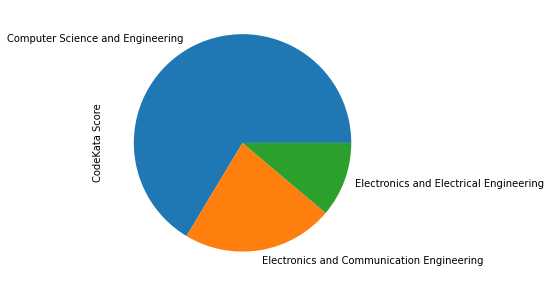

In [100]:
plot = deptwiseScore.plot.pie(y='CodeKata Score', figsize=(5, 5))

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [101]:
csetopper = data[data["Department"] == "Computer Science and Engineering"]
ecetopper = data[data["Department"] == "Electronics and Communication Engineering"]
eeetopper = data[data["Department"] == "Electronics and Electrical Engineering"]

In [102]:
csetopperScore = csetopper["CodeKata Score"].max()
ecetopperScore = ecetopper["CodeKata Score"].max()
eeetopperScore = eeetopper["CodeKata Score"].max()

Computer Science and Engineering Topper

In [103]:
val = csetopper[csetopper["CodeKata Score"] == csetopperScore]
val["Name"]

0    A.Dharani
Name: Name, dtype: object

Electronics and Communication Engineering Topper

In [104]:
val1 = ecetopper[ecetopper["CodeKata Score"] == ecetopperScore]
val1["Name"]

87    Bodipudi Harini
Name: Name, dtype: object

Electronics and Electrical Engineering Toppers

In [105]:
val2 = eeetopper[eeetopper["CodeKata Score"] == eeetopperScore]
val2["Name"]

84    ASHOK KUMAR K
Name: Name, dtype: object

Horizontal Bar plot to represent Toppers Dept wise: 💻

In [106]:
df = pd.concat([val,val1,val2], axis=0, ignore_index=True)

In [107]:
pivot = pd.pivot_table(data=df, index=['Name'], columns=['Department'], values='CodeKata Score')

[Text(0, 0, 'A.Dharani'),
 Text(0, 0, 'ASHOK KUMAR K'),
 Text(0, 0, 'Bodipuri Harini')]

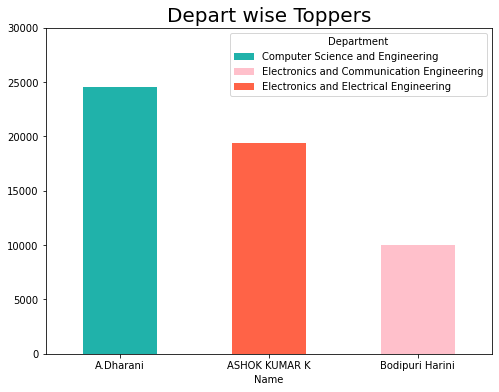

In [108]:
ax = pivot.plot.bar(stacked=True, color =['lightseagreen','pink','tomato'], figsize=(8,6))
ax.set_title("Depart wise Toppers",fontsize=20)
ax.set_ylim(0,30000)
ax.set_xticklabels(['A.Dharani','ASHOK KUMAR K','Bodipuri Harini'], rotation=0)

In [109]:
# Code ends here